Cluster3
3    714
0    286
4    132
6      2
2      2
8      1
7      1
5      1
1      1
Name: count, dtype: int64


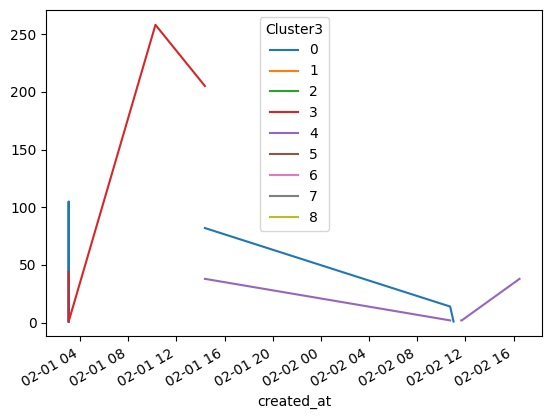

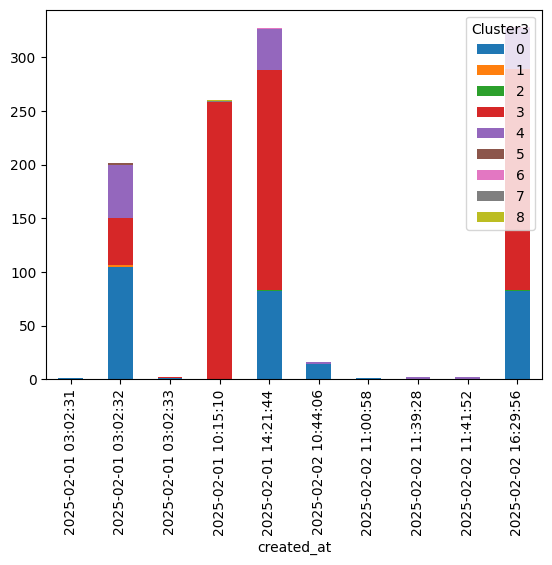

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Read the data
df = pd.read_excel('Sandbox_Errors.xlsx')

# Initialize the TF-IDF vectorizers for each feature
tfid_vectorizer = TfidfVectorizer(stop_words='english')

# Initialize KMeans clustering
kmeans = KMeans(n_clusters=9, random_state=42)

# Create a pipeline for clustering
pipeline = Pipeline(steps=[
    ('features', ColumnTransformer(
        transformers=[
            #('error', tfid_vectorizer, 'Error'),  # TF-IDF for Error
            ('validation_message', tfid_vectorizer, 'validation_message'),  # TF-IDF for validation_message
            ('additional_data', tfid_vectorizer, 'additional_data'),  # TF-IDF for additional_data
            ('config_status', tfid_vectorizer, 'CONFIG_SET_ITEM_STATUS')  # TF-IDF for CONFIG_SET_ITEM_STATUS
        ])),
    ('scaler', StandardScaler(with_mean=False)),  # Optional: Scale the features to normalize the variance
    ('svd', TruncatedSVD(n_components=50)),  # Use TruncatedSVD for dimensionality reduction
    ('kmeans', kmeans)  # Apply KMeans clustering
])

# Fit the model and predict clusters
df['Cluster3'] = pipeline.fit_predict(df)

# Print count of each cluster
print(df['Cluster3'].value_counts())

# Show a plot of the count of each cluster over time
df['created_at'] = pd.to_datetime(df['created_at'])

# Group by 'created_at' and 'Cluster' to plot
df.groupby(['created_at', 'Cluster3']).size().unstack().plot(kind='line', stacked=False)
plt.show()

# Show a bar plot of the count of each cluster over created_at
df.groupby(['created_at', 'Cluster3']).size().unstack().plot(kind='bar', stacked=True)
plt.show()


#df.to_excel('Sandbox_Errors_clustered.xlsx', index=False)

In [ ]:
# save the model
#import joblib

#joblib.dump(pipeline, 'clustering_success_errors.pkl')

['clustering_success_errors.pkl']

### Load the model saved above

In [29]:
import joblib

#  load the model
pipeline = joblib.load('clustering_errors.pkl')

print(df['Cluster3'].value_counts())

# df.to_excel('Sandbox_Errors_clustered.xlsx', index=False)

Cluster3
3    714
0    286
4    132
6      2
2      2
8      1
7      1
5      1
1      1
Name: count, dtype: int64
